In [1]:
!poetry install

Installing dependencies from lock file

No dependencies to install or update


In [2]:
from utils import LDA

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [3]:
lda = LDA(
    texts_query="""
        SELECT
            anime_id,
            synopsis
        FROM animes_catalog c;
    """,
    texts_col="synopsis"
)

Executing query 
        SELECT
            anime_id,
            synopsis
        FROM animes_catalog c;
    


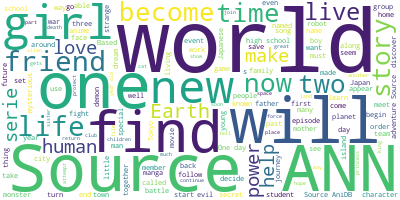

In [4]:
lda.get_words_cloud()

In [5]:
lda.train_model(
    extra_stop_words=[
        "source",
        "one",
        "two",
        "three",
        "world",
        "new",
        "now",
        "episode",
        "episodes",
        "also",
        "however",
        "even",
        "dvd",
        "school",
        "anime",
        "source",
        "anidb",
        "animation",
        "must",
        "another",
        "ann"
    ],
    num_topics=3
)

In [6]:
lda.get_topics_graphics()

In [7]:
df_synopsis = lda.add_data_topics()
df_synopsis.head()

,anime_id,synopsis,topic_1,topic_2,topic_3
0,2904,"One year has passed since the Black Rebellion,...",0.014213,0.465480,0.520306
1,32324,promotional video for the third compiled volum...,0.954932,0.023530,0.021538
2,9361,olly Star-Racer is a pilot music video/product...,0.038208,0.036675,0.925117
3,29501,Cats play baseball at night. When their ball g...,0.376566,0.027947,0.595487
4,30425,"usic video for ‘Wake Up! Dodo’, from the album...",0.072172,0.070791,0.857037


In [8]:
lda = LDA(
    texts_query="""
        SELECT
            anime_id,
            genre
        FROM animes_catalog c;
    """,
    texts_col="genre"
)

Executing query 
        SELECT
            anime_id,
            genre
        FROM animes_catalog c;
    


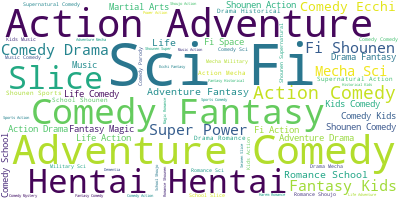

In [9]:
lda.get_words_cloud()

In [10]:
lda.train_model(
    extra_stop_words=[],
    num_topics=3
)

In [11]:
lda.get_topics_graphics()

In [12]:
df_genre = lda.add_data_topics()
df_genre.head()

,anime_id,genre,topic_1,topic_2,topic_3
0,2904,"Action, Drama, Mecha, Military, Sci-Fi, Super ...",0.127708,0.760463,0.111829
1,32324,"Shounen, Sports",0.183049,0.167824,0.649127
2,9361,"Mecha, Music",0.173510,0.170970,0.655519
3,29501,"Kids, Sports",0.182931,0.167823,0.649246
4,30425,Music,0.173535,0.170973,0.655491
